#**Final Project: Data Analysis with Python - E-Commerce Public** **Dataset**



*   Name: Aurisa Rabina Komariah
* Major: Informatics, Universitas Mercu Buana

*  ML-79 Cohort
* Email : aurisarabina@gmail.com
* ID Dicoding : aurisarbn






# **BUSINESS QUESTION**


1.   What is the average number of days for an order to be received after purchasing a product?
2.   Are there many late deliveries? What is the percentage?

1.   Among all purchase histories, which region has the highest number of purchases?
2.   What is the most commonly used payment method?







# **PREPARATION**

Sebelum memulai, silahkan list dan import library yang dibutuhkan

In [ ]:
#Setting Up All the Required Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import urllib

Kode dibawah ini untuk menghubungkan google colab dan google drive agar bisa mengakses data yang ada di google drive

In [ ]:
#Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Data Wrangling**

# 1.1 Gathering Data

Kode tersebut digunakan untuk membaca lima dataset dari Google Drive menggunakan Pandas. Setiap dataset (geolocation, payments, orders, customers, reviews) disimpan dalam dictionary bernama data, yang memudahkan akses ke masing-masing dataset untuk analisis lebih lanjut.

In [ ]:
# Path to the EcommerceDataset in Google Drive
folder_path = '/content/drive/My Drive/EcommerceDataset/'

# Reading 5 datasets at once
geolocation = pd.read_csv(folder_path + 'geolocation_dataset.csv')
payments = pd.read_csv(folder_path + 'order_payments_dataset.csv')
orders = pd.read_csv(folder_path + 'orders_dataset.csv')
customers = pd.read_csv(folder_path + 'customers_dataset.csv')
reviews = pd.read_csv(folder_path + 'order_reviews_dataset.csv')

data = {'orders': orders,
        'payments': payments,
        'geolocation': geolocation,
        'customers' : customers,
        'reviews' : reviews}

In [ ]:
# Displaying the first five rows of the geolocation column
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Displaying the first five rows of the payments column
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Displaying the first five rows of the orders column
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Displaying the first five rows of the customers column
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Displaying the first five rows of the reviews column
data['reviews'].head()

# 1.2 Assesing Data

1.2.1 Checking all the information in the dataset

In [ ]:
data['geolocation'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
data['payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
data['orders'].info() #ini diubah jadi datetime yang 3 itu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# List of columns to convert to datetime
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Convert each column to datetime
for column in datetime_columns:
    orders[column] = pd.to_datetime(orders[column], errors='coerce')

# Check the data types after conversion
print(orders.dtypes)


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [ ]:
data['customers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
data['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# List of columns to convert to datetime
datetime_reviews = [
    'review_creation_date',
    'review_answer_timestamp'
]

# Convert each column to datetime
for column in datetime_reviews:
    reviews[column] = pd.to_datetime(reviews[column], errors='coerce')

# Check the data types after conversion
print(reviews.dtypes)


review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


# 1.2.2 Checking for Missing Values

Fungsi untuk cek missing value digunakan untuk mengidentifikasi data yang hilang atau tidak tersedia dalam suatu dataset. Dengan memeriksa missing value, kita bisa menentukan apakah perlu mengisi, menghapus, atau menangani data tersebut sebelum melakukan analisis lebih lanjut. Ini penting untuk memastikan kualitas dan keakuratan analisis yang dilakukan.

In [ ]:
data['geolocation'].isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
data['payments'].isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
data['orders'].isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
data['customers'].isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
data['reviews'].isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


# 1.2.3 Checking for Duplicates

Fungsi untuk cek duplikat digunakan untuk mengidentifikasi baris yang memiliki data yang sama dalam dataset. Dengan memeriksa duplikat, kita dapat menghapus atau menangani data yang berulang untuk memastikan keakuratan analisis. Mengeliminasi duplikat membantu menjaga integritas dataset dan mencegah bias dalam hasil analisis.

In [ ]:
print("Number of Duplicates: ", geolocation.duplicated().sum())
print("Sample Size:", len(geolocation))

geolocation.describe()

Number of Duplicates:  261831
Sample Size: 1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
print("Number of Duplicates: ", payments.duplicated().sum())
print("Sample Size:", len(payments))

geolocation.describe()

Number of Duplicates:  0
Sample Size: 103886


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
print("Number of Duplicates: ", orders.duplicated().sum())
print("Sample Size:", len(orders))

geolocation.describe()

Number of Duplicates:  0
Sample Size: 99441


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
print("Number of Duplicates: ", customers.duplicated().sum())
print("Sample Size:", len(customers))

geolocation.describe()

Number of Duplicates:  0
Sample Size: 99441


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
print("Number of Duplicates: ", reviews.duplicated().sum())
print("Sample Size:", len(reviews))

geolocation.describe()

Number of Duplicates:  0
Sample Size: 99224


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


# 1.3 Data Cleaning

1.3.1 Removing Duplicate Data

Geolocation

In [ ]:
# remove duplicate data
data['geolocation'].drop_duplicates(inplace=True)

In [ ]:
print("Number of Duplicates :  ", geolocation.duplicated().sum())

Number of Duplicates :   0


Reviews

In [ ]:
print('Review cols: ' , data['reviews'].columns.values)

# the review_comment_title column is 88% NaN so i'll just drop it.
# TODO: nans for reviews just means there are none (?).
# So maybe just assume that's all there is and use the data separately for a etxt analysis (in M3) ENDTODO

# and when the review was sent to the customer
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [ ]:
# for now I won't do any text analysis so I'm not super interested in the comment message
# it looks like in this column there are nans if people did not leave a review
# I don't want to drop the column, so I will just replace nan by 0 and the review by 1
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

Orders

In [ ]:
orders = data['orders'].dropna()

# Memeriksa jumlah baris setelah penghapusan
print("Jumlah baris setelah penghapusan:", orders.shape[0])

# Memeriksa kembali apakah masih ada missing values
print(orders.isnull().sum())

Jumlah baris setelah penghapusan: 96461
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


# **2. Exploratory Data Analysis (EDA)**

EDA (Exploratory Data Analysis) adalah proses menganalisis dan memahami dataset untuk mengidentifikasi pola, tren, dan outlier. Tujuannya adalah untuk mendapatkan wawasan awal yang membantu dalam pengambilan keputusan analisis selanjutnya.

2.1 Explor Geolocation

In [ ]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
251563,11390,-23.966805,-46.371975,sao vicente,SP
257697,11680,-23.485280,-45.105220,ubatuba,SP
365969,17030,-22.319053,-49.040723,bauru,SP
31450,2435,-23.476112,-46.633257,são paulo,SP
791460,72610,-15.904296,-48.059020,brasília,DF


In [ ]:
data['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [ ]:
data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


2.2 Explore Orders

In [ ]:
# Calculating delivery time in days using .loc
orders.loc[:, 'delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Calculating average delivery
average_delivery_time = orders['delivery_time_days'].mean()
print(f"Average Delivery : {average_delivery_time:.0f} hari")

# Calculating late deliveries
orders.loc[:, 'is_late'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']
late_percentage = (orders['is_late'].sum() / len(orders)) * 100
print(f"Late Percentage: {late_percentage:.2f}%")


Average Delivery : 12 hari
Late Percentage: 8.11%


2.3 Explore Payments

In [ ]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
87001,f4ca52bb4cdf0d58abc5784ded7c43b9,1,boleto,1,57.82
14991,a3e6136894621db402a772c6bc72a12a,1,credit_card,10,256.90
86878,d3bf07368c28fc881c427ec119b01153,1,boleto,1,202.50
84477,065ac4b340bafd4f6bee041c63e10aef,1,credit_card,1,32.09
49069,df2bdc45d6c56cd6dce35aea5c391f4e,1,credit_card,1,69.97


In [ ]:
payment_counts = data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

In [ ]:
average_payment_value = payments.groupby('payment_type')['payment_value'].mean().reset_index()
print(average_payment_value)

  payment_type  payment_value
0       boleto     145.034435
1  credit_card     163.319021
2   debit_card     142.570170
3  not_defined       0.000000
4      voucher      65.703354


2.4 Explore Customers

In [ ]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1718,040998babd9231bd6c86f6e85707fa5e,0ff6bebd4c4327455d347885e2697876,11440,guaruja,SP
73973,24e087703533b976db3e2d867e2b07af,87307bedec2b4496fc1fac01d1d98a20,15502,votuporanga,SP
98182,97406ce3b7598fcdb519388974d490e3,91d4dd867564987abda83ceaa6259378,30570,belo horizonte,MG
71396,34425af515e189a4aa18e67c29f44e38,266bc4c355bf3b5f9797a9f3e7c114f9,3126,sao paulo,SP
1585,5672aedd63b647c1efe483389f89ac2c,de063bea4f3c9809b4780af305873f02,37552,pouso alegre,MG


In [ ]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


2.5 Explore customers and orders

In [ ]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
orders = pd.merge(orders, customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')


In [ ]:
print(orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time_days', 'is_late', 'customer_state'],
      dtype='object')


2.6 merge payments and reviews

In [ ]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [ ]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,1.0,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,1.0,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,1.0,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,0.0,2018-08-24,2018-08-25 02:24:54


2.7 merge reviews and orders

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


2.8 EXPLORE ALL DATA

In [ ]:
all_data = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2017-10-04,1.0,debit_card,1.0,282.21,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29,2017-10-01 21:52:53
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,2018-03-05,1.0,credit_card,1.0,22.77,bc88d3b86fa8443d42894eb7b5f0d73c,5.0,0.0,2018-02-21,2018-02-26 13:53:18
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,2017-12-08,1.0,credit_card,3.0,36.01,2381e1fb0932d9459573a0553dd8a2b5,3.0,0.0,2017-11-28,2017-11-28 17:14:46
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,2018-02-20,1.0,debit_card,1.0,39.10,8566d94f7bf3bedbb4ca6a29725fc382,5.0,1.0,2018-01-27,2018-01-30 19:18:27
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,2018-02-05,1.0,credit_card,1.0,122.47,07f4bedc3ab711f4b3400ceaecdd9f9b,5.0,1.0,2018-01-14,2018-01-16 19:29:39


In [ ]:
all_data_df = all_data.drop_duplicates('order_id')

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 0 to 104477
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated_del

In [ ]:
# Define the path where you want to save the file
file_path = '/content/drive/My Drive/EcommerceDataset/all_data.csv'

# Check if the directory exists, if not, create it
folder_path = '/content/drive/My Drive/EcommerceDataset'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the DataFrame to the specified directory
all_data_df.to_csv(file_path, index=False)

# **3. Data Visualization & Explanatory**

# 3.1 What is the average number of days for an order to be received after purchasing a product?


In [ ]:
print(orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time_days', 'is_late'],
      dtype='object')


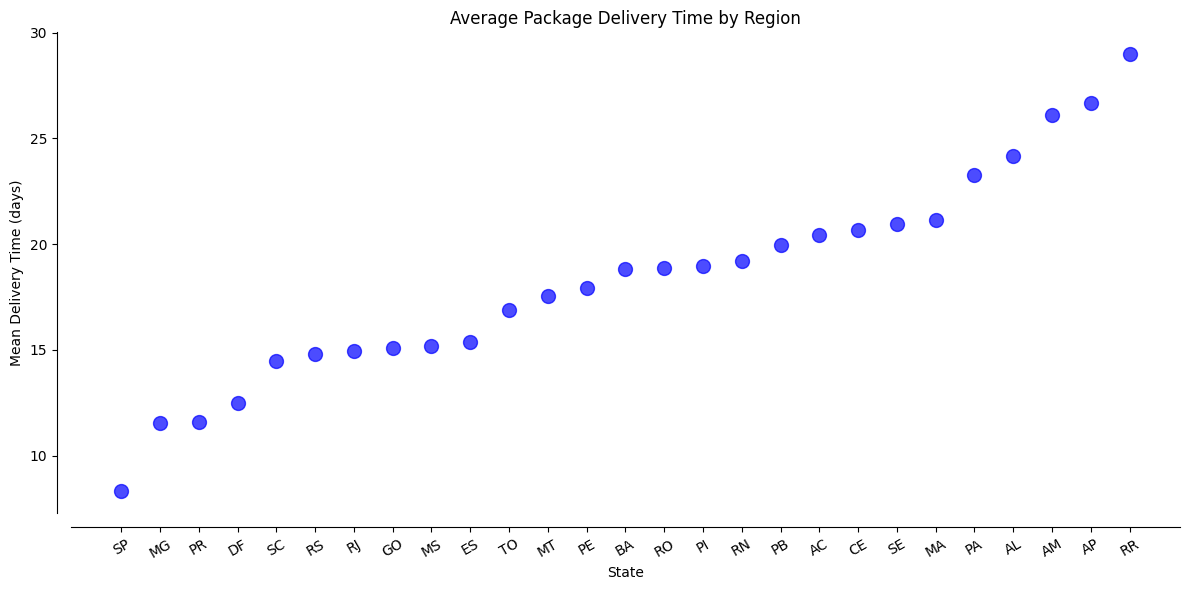

In [ ]:
delivery_summary = orders.groupby('customer_state')['delivery_time_days'].mean().reset_index()
delivery_summary.columns = ['State', 'Mean Delivery Time']

delivery_summary = delivery_summary.sort_values(by='Mean Delivery Time')

def default_plot(ax, spines):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))

    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

# Make figure
fig, ax = plt.subplots(figsize=(12, 6))
ax = default_plot(ax, ['left', 'bottom'])

# Plotting
plt.xticks(rotation=30)
plt.xlabel('State')
plt.ylabel('Mean Delivery Time (days)')
plt.scatter(delivery_summary['State'], delivery_summary['Mean Delivery Time'], s=100, c='blue', alpha=0.7)
plt.title('Average Package Delivery Time by Region')
plt.tight_layout()

# Save plot
plt.savefig('drive/MyDrive/data/delivery_time_mean.png', dpi=300)
plt.show()


# 3.2 Are there many late deliveries? What is the percentage?

In [ ]:
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# add column is_late
orders['is_late'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

late_percentage = (orders['is_late'].sum() / len(orders)) * 100
print(f"Percentage of Late Deliveries: {late_percentage:.2f}%")


Percentage of Late Deliveries: 8.06%


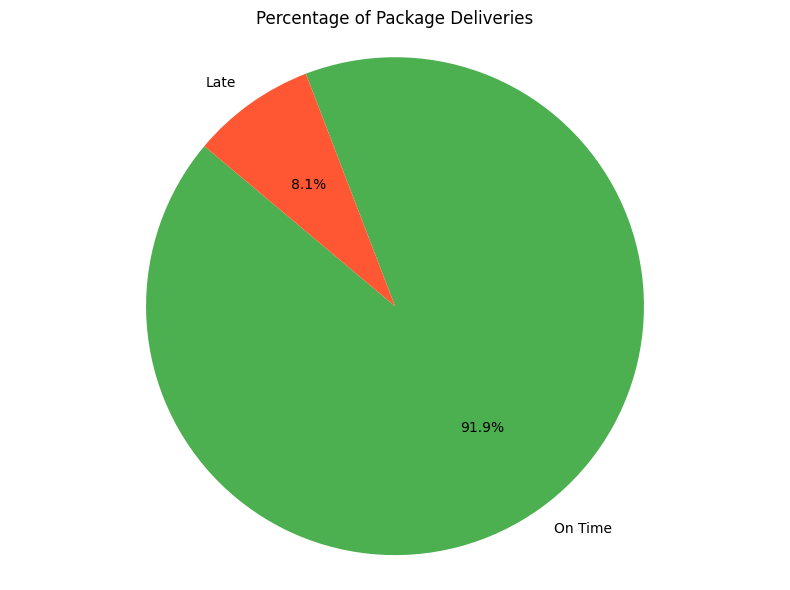

In [ ]:
labels = ['On Time', 'Late']
sizes = [len(orders) - orders['is_late'].sum(), orders['is_late'].sum()]
colors = ['#4CAF50', '#FF5733']  # color settings

# Make a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Package Deliveries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save and display plot
plt.savefig('drive/MyDrive/data/shipping_delay_percentage.png', dpi=300)
plt.show()



# 3.3 Among all purchase histories, which region has the highest number of purchases?

In [ ]:
other_state_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,16a27e5ffd29a7cdf0e4984b0cab46b7,5.0,0.0,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.502307,-47.396740
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,23be511c12a57fe4052555f9c8905d8b,5.0,0.0,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.502307,-47.396740
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,e0fd752f37c8c6866ceb53b79b0715f6,5.0,0.0,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.502307,-47.396740
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,51fb9267e6687e5ab21e4539999188ed,5.0,0.0,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.502307,-47.396740
5,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,14409,franca,SP,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:01,2017-06-11 17:45:15,2017-06-13 09:18:58,...,1991c75dd8acba50a854d1a24a876827,5.0,1.0,2017-06-20,2017-06-21 16:20:42,14409,franca,SP,-20.502307,-47.396740
6,96fbbe8005e67d382b0fc453a288be02,8d153d12b59d763efeb3953822c51862,14409,franca,SP,0add19297766bc00a177a9ae740554eb,delivered,2018-04-01 22:50:57,2018-04-02 22:48:13,2018-04-05 20:49:46,...,bfe227aa0debbceffebfe9f4638dbcc2,2.0,0.0,2018-04-13,2018-04-16 01:14:09,14409,franca,SP,-20.502307,-47.396740
7,7d58157ef9ab184d29d36f009c7ad786,4dd678b3eb5be4a5589f5566ec386e09,14409,franca,SP,40a53ec6d0f15a6e4366a5e07c5f6ce2,delivered,2018-06-16 19:20:49,2018-06-17 19:15:14,2018-06-18 15:11:00,...,fe402e28e225c2b468946a5825d0e494,4.0,0.0,2018-06-21,2018-06-23 21:17:28,14409,franca,SP,-20.502307,-47.396740
8,d3c09791fc7ede919353f0488a3375a6,422b5643b144b86f0168965efd90c219,14409,franca,SP,bbc23131aab4b505c48b17061d069db2,delivered,2017-11-25 20:35:09,2017-11-25 20:51:53,2017-11-28 19:11:31,...,630b70f1a74f0e02084d9ced342c7b9b,5.0,1.0,2017-12-12,2017-12-13 00:45:51,14409,franca,SP,-20.502307,-47.396740
9,29e139325c0dac2e5a95c165699b68c3,d0fa1eaf9648a765ed0458e85186703d,14409,franca,SP,97eb8123f2508dda8d9234f0aca79572,delivered,2018-04-13 14:54:22,2018-04-13 15:13:22,2018-04-19 00:37:33,...,4a91f1456cb460b89751e9f115c3c3f1,5.0,0.0,2018-04-25,2018-04-27 14:02:33,14409,franca,SP,-20.502307,-47.396740


In [ ]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [ ]:
customers_silver.to_csv("drive/MyDrive/data/geolocation.csv", index=False)

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/736x/78/e4/4d/78e44d81dbd629c0e6ca85c8124098b7.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

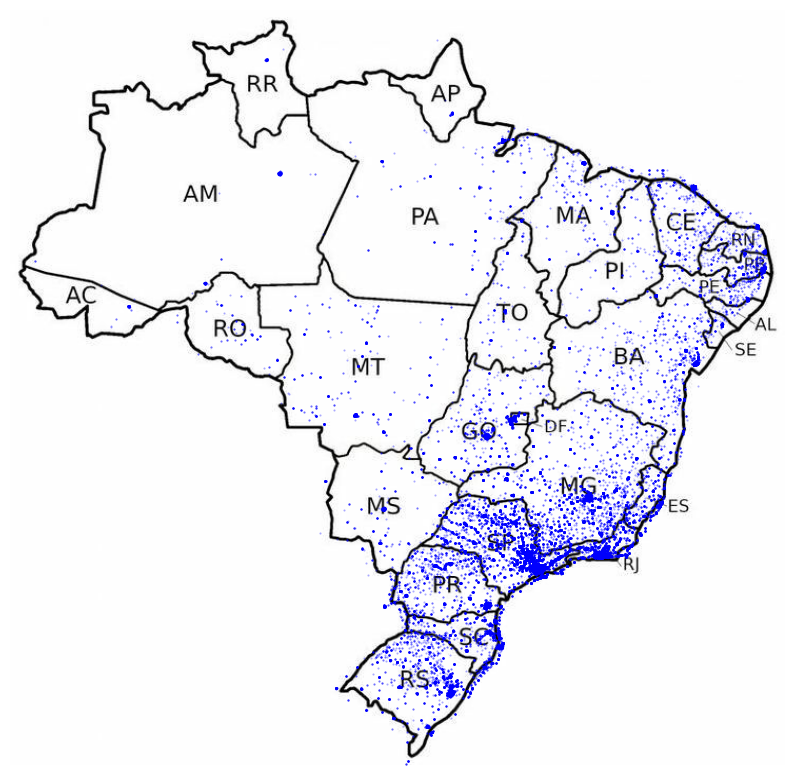

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

3.4 What is the most commonly used payment method?

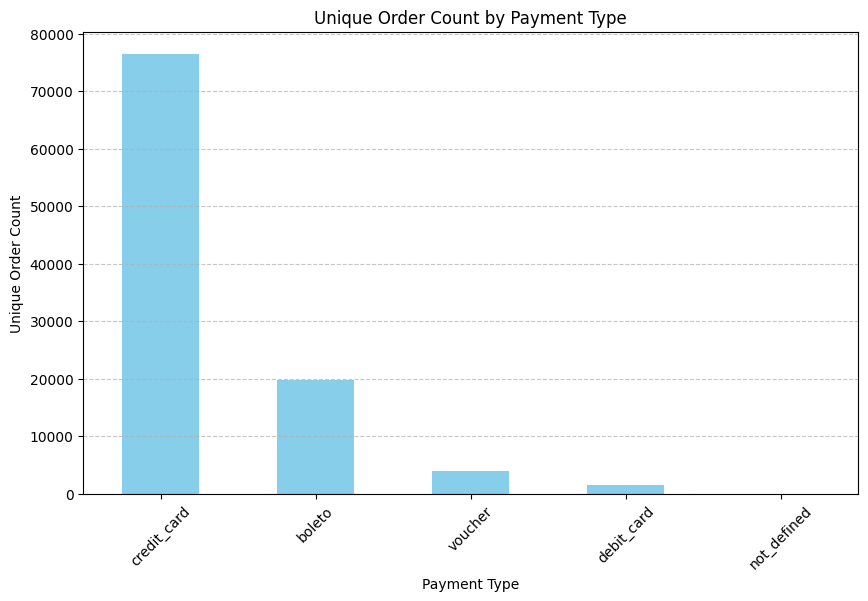

In [ ]:
payment_counts = data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

# Make Bar Chart
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Order Count by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Unique Order Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Conclusion**

1. What is the average number of days for an order to be received after purchasing a product?


> Based on the analysis conducted, the average delivery time to customers is 12 days after purchase, and this time frame can vary depending on the city of destination.

2. Are there many late deliveries? What is the percentage?
> After analyzing and visualizing the data, it was found that a small percentage of packages, 8.1%, arrived later than the estimated delivery time. However, the percentage of late deliveries is relatively low.

3. Among all purchase histories, which region has the highest number of purchases?
> Based on the graph created, there are more customers located in the southeast and south regions. Additionally, the data indicates that many customers reside in capital cities such as São Paulo, Rio de Janeiro, Porto Alegre, and others.

4. What is the most commonly used payment method?
> Based on the data visualization, the most commonly used payment method is debit card, with nearly 80,000 transactions recorded using this method.








